In [110]:
import pandas as pd
import glob

file_paths = glob.glob("daily-treasury-rates_*.csv")

In [111]:
combined_data = pd.DataFrame()

for file_path in file_paths:
    data = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, data], ignore_index=True)

print(combined_data)

            Date  1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  \
0     12/30/2016  0.44  0.51  0.62  0.85  1.20  1.47  1.93  2.25   2.45   
1     12/29/2016  0.39  0.47  0.62  0.85  1.22  1.49  1.96  2.30   2.49   
2     12/28/2016  0.48  0.53  0.62  0.90  1.26  1.55  2.02  2.32   2.51   
3     12/27/2016  0.50  0.51  0.66  0.89  1.28  1.58  2.07  2.37   2.57   
4     12/23/2016  0.42  0.52  0.65  0.87  1.22  1.54  2.04  2.35   2.55   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
1972  01/07/2022  0.05  0.10  0.24  0.43  0.87  1.17  1.50  1.69   1.76   
1973  01/06/2022  0.04  0.10  0.23  0.45  0.88  1.15  1.47  1.66   1.73   
1974  01/05/2022  0.05  0.09  0.22  0.41  0.83  1.10  1.43  1.62   1.71   
1975  01/04/2022  0.06  0.08  0.22  0.38  0.77  1.02  1.37  1.57   1.66   
1976  01/03/2022  0.05  0.08  0.22  0.40  0.78  1.04  1.37  1.55   1.63   

      20 Yr  30 Yr  2 Mo  4 Mo  
0      2.79   3.06   NaN   NaN  
1      2.82   3.08   NaN   NaN  


In [112]:
print(combined_data.shape)

(1977, 14)


In [113]:
missing_values_count = combined_data.isnull().sum()
print(missing_values_count)

Date        0
1 Mo        0
3 Mo        0
6 Mo        0
1 Yr        0
2 Yr        0
3 Yr        0
5 Yr        0
7 Yr        0
10 Yr       0
20 Yr       0
30 Yr       0
2 Mo      698
4 Mo     1700
dtype: int64


In [114]:
column_names = combined_data.columns
print(column_names)

Index(['Date', '1 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',
       '10 Yr', '20 Yr', '30 Yr', '2 Mo', '4 Mo'],
      dtype='object')


In [115]:
combined_data = combined_data.drop(columns=['2 Mo', '4 Mo'])

In [116]:
print(combined_data)

            Date  1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  \
0     12/30/2016  0.44  0.51  0.62  0.85  1.20  1.47  1.93  2.25   2.45   
1     12/29/2016  0.39  0.47  0.62  0.85  1.22  1.49  1.96  2.30   2.49   
2     12/28/2016  0.48  0.53  0.62  0.90  1.26  1.55  2.02  2.32   2.51   
3     12/27/2016  0.50  0.51  0.66  0.89  1.28  1.58  2.07  2.37   2.57   
4     12/23/2016  0.42  0.52  0.65  0.87  1.22  1.54  2.04  2.35   2.55   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
1972  01/07/2022  0.05  0.10  0.24  0.43  0.87  1.17  1.50  1.69   1.76   
1973  01/06/2022  0.04  0.10  0.23  0.45  0.88  1.15  1.47  1.66   1.73   
1974  01/05/2022  0.05  0.09  0.22  0.41  0.83  1.10  1.43  1.62   1.71   
1975  01/04/2022  0.06  0.08  0.22  0.38  0.77  1.02  1.37  1.57   1.66   
1976  01/03/2022  0.05  0.08  0.22  0.40  0.78  1.04  1.37  1.55   1.63   

      20 Yr  30 Yr  
0      2.79   3.06  
1      2.82   3.08  
2      2.83   3.09  
3      2.88   3

In [117]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_columns = combined_data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data[numeric_columns])

In [118]:
#Perform PCA 
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Analyze explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Print the results
print("Explained Variance Ratio:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Explained Variance Ratio:
[9.43325907e-01 4.50862303e-02 9.14477788e-03 1.18476822e-03
 8.11992601e-04 2.67029746e-04 8.43923802e-05 5.23434960e-05
 2.32299385e-05 1.29634097e-05 6.36532852e-06]

Cumulative Explained Variance:
[0.94332591 0.98841214 0.99755691 0.99874168 0.99955368 0.99982071
 0.9999051  0.99995744 0.99998067 0.99999363 1.        ]


Text(0.5, 1.0, 'Cumulative Explained Variance')

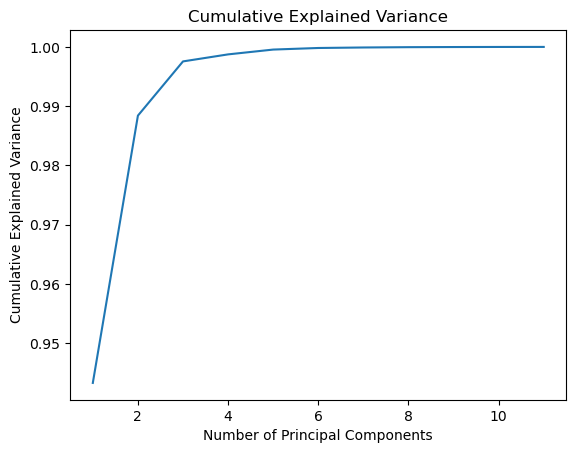

In [119]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

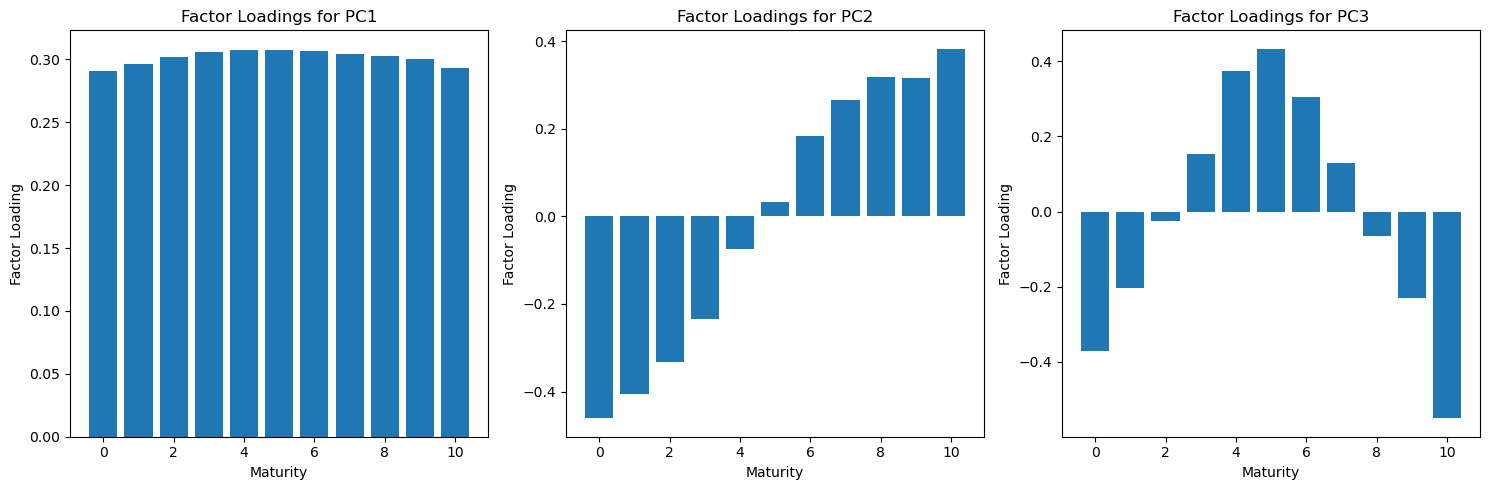

In [120]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Adjust the figsize as needed

for pc_num in range(3):
    factor_loadings = pca.components_[pc_num]

    # Plot factor loadings on the corresponding subplot
    axs[pc_num].bar(range(len(factor_loadings)), factor_loadings)
    axs[pc_num].set_title(f'Factor Loadings for PC{pc_num + 1}')
    axs[pc_num].set_xlabel('Maturity')
    axs[pc_num].set_ylabel('Factor Loading')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

In [122]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

In [123]:
#convert back to original feature space and calculate residual 
proj = pca.inverse_transform(pca_result)

In [124]:
residuals = scaled_data - proj
print(residuals)
print(residuals.shape)

[[ 0.02191483  0.00585815 -0.02559425 ... -0.00403406 -0.03902827
   0.01568791]
 [ 0.01854986  0.00213049 -0.01399872 ...  0.00132003 -0.03841838
   0.0093502 ]
 [ 0.0434977   0.00561712 -0.04818672 ...  0.00052318 -0.04633887
   0.00941352]
 ...
 [ 0.08539371  0.01431367 -0.04178407 ...  0.01358708  0.08825614
  -0.12146354]
 [ 0.08008943  0.00756879 -0.0303914  ...  0.00414859  0.10061084
  -0.12408258]
 [ 0.08395999  0.00993315 -0.03546802 ...  0.01106956  0.09366533
  -0.12649935]]
(1977, 11)


In [125]:
dates = combined_data['Date']
print(date.shape)

(1977,)


In [144]:
# Convert the 'dates' to datetime format
dates = pd.to_datetime(dates)

# Create a DataFrame with dates and residuals
data = {'Date': dates}
for i, tenor in enumerate(legend_labels):
    data[tenor] = residuals[:, i]

df = pd.DataFrame(data)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

<Figure size 100000x100000 with 0 Axes>

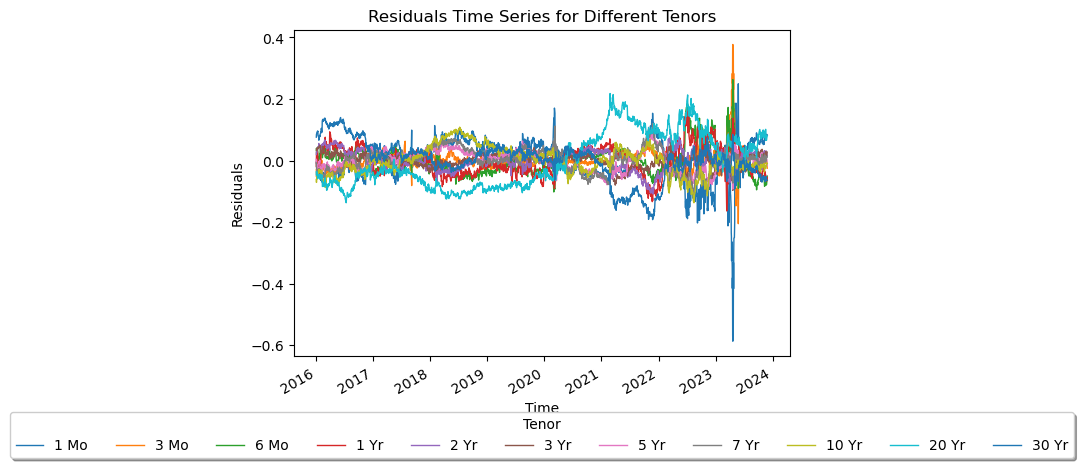

In [138]:
plt.figure(figsize=(1000, 1000))
df.plot(lw=1)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals Time Series for Different Tenors')
plt.legend(title='Tenor')
plt.legend(title='Tenor', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(df.columns))
plt.show()

In [139]:
new_data = pd.read_csv("daily-treasury-rates_2023.csv")
new_data = new_data.drop(columns=['2 Mo', '4 Mo', 'Date'])
selected_row = new_data.iloc[10] #11/10/2023
print(selected_row)

1 Mo     5.53
3 Mo     5.53
6 Mo     5.46
1 Yr     5.38
2 Yr     5.04
3 Yr     4.80
5 Yr     4.65
7 Yr     4.68
10 Yr    4.61
20 Yr    4.93
30 Yr    4.73
Name: 10, dtype: float64


In [140]:
scaled_new_data = scaler.transform(selected_row.values.reshape(1, -1))

/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [141]:
pca_result_new = pca.transform(scaled_new_data)
projection_new = pca.inverse_transform(pca_result_new)
residuals_new = scaled_new_data - projection_new
print(residuals_new)

[[ 0.088464   -0.01188523 -0.0840487  -0.04339043  0.0251319   0.01164288
   0.00549413  0.01846439 -0.02585362  0.07545264 -0.05819232]]


In [142]:
tenors = selected_row.index[0:].tolist()  # Assuming the tenors start from the second column
print(tenors)

['1 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']


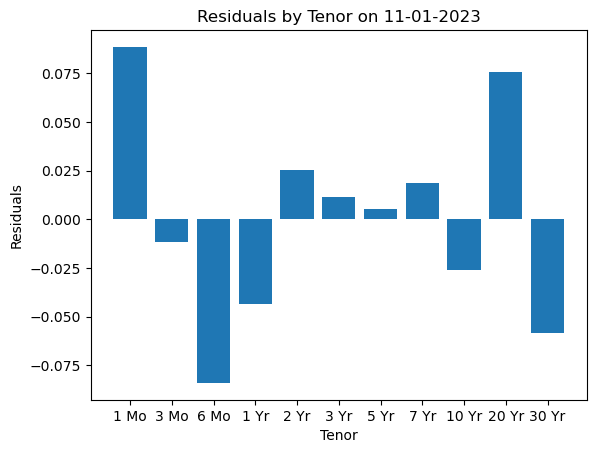

In [143]:
plt.bar(tenors, residuals_new[0])
plt.title('Residuals by Tenor on 11-01-2023')
plt.xlabel('Tenor')
plt.ylabel('Residuals')
plt.show()